# **Body Fat Prediction Project**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/body-fat-prediction-dataset/bodyfat.csv


In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

: 


The following code shows reading a CSV file, "bodyfat.csv," using pandas and storing it in the variable df. This allows us to access and analyze the dataset.

In [ ]:
FILE_DIR="/kaggle/input/body-fat-prediction-dataset/bodyfat.csv"

In [ ]:
# Read in the insurance dataset
df = pd.read_csv(FILE_DIR)

# Check out the insurance dataset
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.shape

(252, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Set the target

In [ ]:
target="BodyFat"

**Make_Column_Transformer**

The next code block extracts the numerical features from the dataset and stores them in the numerical_features list. The target variable is excluded from the list. This code is done to separate the numerical features for further processing.

In [ ]:
numerical_features = df._get_numeric_data().columns.to_list()
numerical_features.remove(target)
numerical_features

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

In the subsequent code, the categorical features are extracted from the dataset and stored in the categorical_features list. This is done to separate the categorical features for preprocessing.

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
categorical_features

[]

The next code block imports necessary libraries and initializes a column transformer, ct, which will be used for data normalization and preprocessing.

After that, the code creates input features X and target variable y by splitting the dataset. The training and test sets (X_train, X_test, y_train, y_test) are generated using the train_test_split function.

The following code fits the column transformer ct on the training data and transforms both the training and test data using the fitted transformer. This is important to normalize and preprocess the data consistently across the training and test sets.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), numerical_features))

# Create X & y
X = df.drop(target, axis=1)
y = df[target]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

Density      1.0708
Age         23.0000
Weight     154.2500
Height      67.7500
Neck        36.2000
Chest       93.1000
Abdomen     85.2000
Hip         94.5000
Thigh       59.0000
Knee        37.3000
Ankle       21.9000
Biceps      32.0000
Forearm     27.4000
Wrist       17.1000
Name: 0, dtype: float64

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.47497805, 0.28813559, 0.33448873, 0.85492228, 0.4609375 ,
       0.27755102, 0.29401408, 0.26108374, 0.42647059, 0.23846154,
       0.2260274 , 0.55244755, 0.52517986, 0.23214286])

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((201, 14), (201, 14))

Next, the code block sets up a model checkpoint, cc, which will save the best model during training based on the validation loss.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

cc = ModelCheckpoint('best_model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)


The code sets a random seed for reproducibility and builds a sequential model, model_dn, with three dense layers. The model is compiled with a mean absolute error (MAE) loss function, Adam optimizer, and MAE metric.

The model is then trained for 1500 epochs using the training data, and the validation data is used to monitor the model's performance. The model checkpoint callback is included to save the best model based on the validation loss.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_dn = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_dn.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 1000 epochs
model_dn.fit(X_train_normal, y_train, epochs=1500, validation_data=(X_test_normal, y_test), verbose=1, callbacks=[cc])

Epoch 1/1500
1/7 [===>..........................] - ETA: 3s - loss: 19.7068 - mae: 19.7068
Epoch 1: val_loss did not improve from 0.09682
7/7 [==============================] - 1s 26ms/step - loss: 18.6948 - mae: 18.6948 - val_loss: 16.4279 - val_mae: 16.4279
Epoch 2/1500
1/7 [===>..........................] - ETA: 0s - loss: 17.8080 - mae: 17.8080
Epoch 2: val_loss did not improve from 0.09682
7/7 [==============================] - 0s 6ms/step - loss: 17.2744 - mae: 17.2744 - val_loss: 14.8774 - val_mae: 14.8774
Epoch 3/1500
1/7 [===>..........................] - ETA: 0s - loss: 15.9006 - mae: 15.9006
Epoch 3: val_loss did not improve from 0.09682
7/7 [==============================] - 0s 6ms/step - loss: 15.7032 - mae: 15.7032 - val_loss: 13.1002 - val_mae: 13.1002
Epoch 4/1500
1/7 [===>..........................] - ETA: 0s - loss: 13.5151 - mae: 13.5151
Epoch 4: val_loss did not improve from 0.09682
7/7 [==============================] - 0s 6ms/step - loss: 13.9076 - mae: 13.9076 - 

After training, the code evaluates the model's performance on the test data, calculating the loss (model_dn_loss) and MAE (model_dn_mae).

In [ ]:
# Evaulate the model
model_dn_loss, model_dn_mae = model_dn.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1318 - mae: 0.1318


The next code block uses the trained model to make predictions on the test data (X_test_normal) and stores the predictions in test_pred.

In [ ]:
test_pred = model_dn.predict(X_test_normal)
test_pred

2/2 [==============================] - 0s 2ms/step


array([[19.430902 ],
       [19.4223   ],
       [28.002813 ],
       [20.634323 ],
       [16.788578 ],
       [12.106483 ],
       [23.201048 ],
       [18.822153 ],
       [11.750697 ],
       [12.149486 ],
       [26.191442 ],
       [24.542688 ],
       [14.967399 ],
       [22.548513 ],
       [ 6.228003 ],
       [ 5.0355797],
       [22.065767 ],
       [21.003832 ],
       [20.482723 ],
       [14.069705 ],
       [15.037284 ],
       [16.784237 ],
       [13.992975 ],
       [13.887304 ],
       [21.562994 ],
       [30.367249 ],
       [23.70693  ],
       [15.1266985],
       [ 6.976483 ],
       [13.167921 ],
       [25.019402 ],
       [ 9.652102 ],
       [17.765476 ],
       [18.585155 ],
       [18.953945 ],
       [ 3.387013 ],
       [21.579155 ],
       [16.19638  ],
       [16.67545  ],
       [11.615306 ],
       [13.848923 ],
       [23.707361 ],
       [30.954203 ],
       [ 9.310515 ],
       [13.984924 ],
       [22.584536 ],
       [28.95114  ],
       [21.53

In [ ]:
y_test.shape, test_pred.shape, tf.squeeze(test_pred).shape

((51,), (51, 1), TensorShape([51]))

The following code defines two utility functions: mean_absolute_scaled_error and evaluate_preds. The mean_absolute_scaled_error function calculates the mean absolute scaled error metric. The evaluate_preds function calculates various evaluation metrics, including MAE, MSE, RMSE, MAPE, MASE, and R-squared score.

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Calculate R-squared score
    ss_res = tf.reduce_sum((y_true - y_pred)**2)
    ss_tot = tf.reduce_sum((y_true - tf.reduce_mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)

    # Account for different sized metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
        r2 = tf.reduce_mean(r2)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": str(mape.numpy()) + "%",
            "mase": mase.numpy(),
            "r2": r2.numpy()}

In [ ]:
y_test.shape, test_pred.shape

((51,), (51, 1))

Make sure y_test and test_pred have the same shape

In [ ]:
y_test = tf.squeeze(y_test)
test_pred = tf.squeeze(test_pred)

The code applies these utility functions to the test data (y_test and test_pred), generating a dictionary of evaluation metrics.

In [ ]:
evaluate_preds(y_test,test_pred)

{'mae': 0.13180643,
 'mse': 0.025309298,
 'rmse': 0.15908897,
 'mape': '0.9829897%',
 'mase': 0.018125195,
 'r2': 0.9994559}

In the subsequent code block, the actual and predicted values are formatted into a DataFrame, dr, for further analysis and comparison.

In [ ]:
actual_ys = y_test
predicted_ys = model_dn.predict(X_test_normal)
predicted_ys = predicted_ys.flatten()

data = {f'feature_{i}': X_test_normal[:, i] for i in range(X_test_normal.shape[1])}
data['Actual Y'] = actual_ys
data['Predicted Y'] = predicted_ys

dr = pd.DataFrame(data)
dr

2/2 [==============================] - 0s 4ms/step


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,Actual Y,Predicted Y
0,0.525900,0.220339,0.682842,0.917098,0.734375,0.575510,0.452465,0.480296,0.647059,0.638462,0.445205,0.811189,0.913669,0.642857,19.2,19.430902
1,0.525900,0.067797,0.433276,0.834197,0.414062,0.526531,0.375000,0.376847,0.411765,0.407692,0.260274,0.496503,0.489209,0.339286,19.2,19.422300
2,0.355575,0.355932,0.448873,0.839378,0.468750,0.585714,0.626761,0.443350,0.606618,0.538462,0.308219,0.608392,0.489209,0.285714,28.0,28.002813
3,0.501317,0.220339,0.407279,0.860104,0.570312,0.432653,0.367958,0.337438,0.389706,0.330769,0.226027,0.433566,0.553957,0.339286,20.5,20.634323
4,0.576822,0.305085,0.273830,0.823834,0.406250,0.361224,0.302817,0.187192,0.319853,0.253846,0.205479,0.349650,0.381295,0.267857,16.7,16.788578
5,0.669886,0.305085,0.282496,0.834197,0.328125,0.265306,0.306338,0.273399,0.397059,0.492308,0.246575,0.363636,0.388489,0.285714,12.1,12.106483
6,0.449517,0.355932,0.362218,0.787565,0.492188,0.497959,0.357394,0.226601,0.415441,0.461538,0.342466,0.629371,0.561151,0.535714,23.6,23.201048
7,0.538191,0.677966,0.348354,0.787565,0.562500,0.518367,0.461268,0.214286,0.264706,0.315385,0.246575,0.384615,0.381295,0.446429,18.6,18.822153
8,0.677788,0.016949,0.552860,0.911917,0.859375,0.414286,0.338028,0.470443,0.584559,0.669231,0.404110,0.755245,0.647482,0.607143,11.7,11.750697
9,0.672520,0.169492,0.440208,0.917098,0.593750,0.432653,0.339789,0.364532,0.378676,0.438462,1.013699,0.538462,0.482014,0.464286,11.9,12.149486


The next code block ensures that the y_test and test_pred arrays are 1D and then creates a DataFrame, dw, containing the actual and predicted values, as well as the difference and percentage difference between them.

In [ ]:
# Ensure 'ytest' and 'test_pred' are 1D
ytest_1D = tf.squeeze(y_test)
test_pred_1D = tf.squeeze(test_pred)

# Now create the DataFrame
dw = pd.DataFrame({'Actual': ytest_1D, 'Predicted': test_pred_1D})

# Calculate the difference
dw['Difference'] = dw['Predicted'] - dw['Actual']

# Calculate the percentage difference
dw['Percentage Difference'] = (dw['Difference'] / dw['Actual']) * 100

dw = dw.round(2)
dw.head(30)

,Actual,Predicted,Difference,Percentage Difference
0,19.2,19.430000,0.23,1.20
1,19.2,19.420000,0.22,1.16
2,28.0,28.000000,0.00,0.01
3,20.5,20.629999,0.13,0.66
4,16.7,16.790001,0.09,0.53
5,12.1,12.110000,0.01,0.05
6,23.6,23.200001,-0.40,-1.69
7,18.6,18.820000,0.22,1.19
8,11.7,11.750000,0.05,0.43
9,11.9,12.150000,0.25,2.10


Following that, the code plots the last 200 records of the predicted and actual values to visualize their comparison.


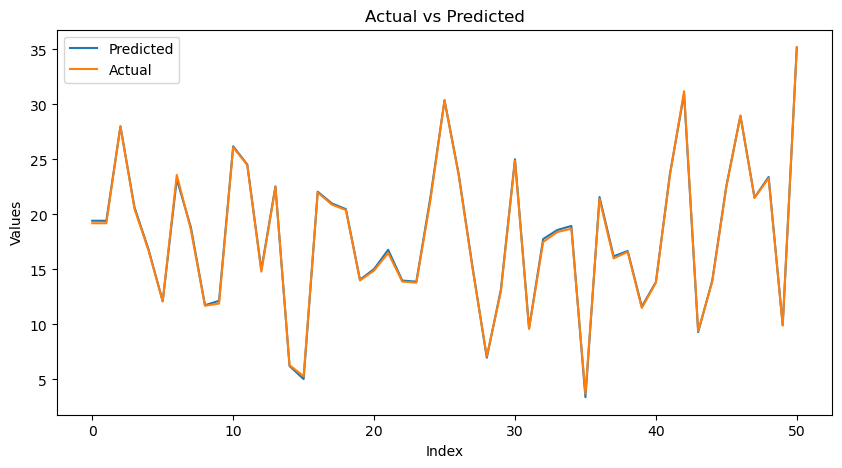

In [ ]:
# Get last 200 records from your data
y_pred_sub = test_pred[-200:]
y_test_sub = y_test[-200:]

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_pred_sub)), y_pred_sub, label='Predicted')
plt.plot(range(len(y_test_sub)), y_test_sub, label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

Finally, two scatter plots are created to check for linearity between the actual and predicted values. The plots help assess how well the model's predictions align with the actual values.

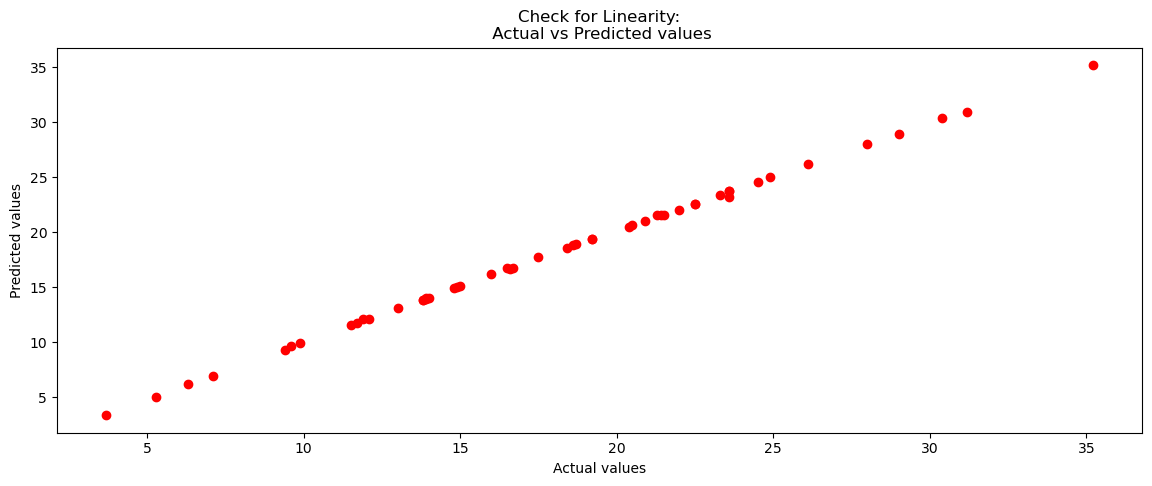

In [ ]:
plt.figure(figsize=(14,5))
plt.scatter(y_test, test_pred, color='r')
plt.title('Check for Linearity:\n Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()